In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/daily_final.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,Entity,Code,Date,Cases,Deaths,Disease,Average Temperature (C),Average Temperature (F),Most Repeated Weather Phrase,Average Wind Speed (mph),Average Wind Speed (kph),Average Wind Degree,Most Repeated Wind Direction,Average Pressure,Average Dew Point,Average Heat Index,Average Visibility,Most Repeated Cloud Cover,Average UV Index,Symptoms
0,India,IND,2010-01-01,22.0,NaN,Cholera,12.678063,54.82051282,Fair,5.121212,8.241772,239.0909091,W,29.180769,47.23076923,54.82051282,0.635385,CLR,0.000000,"[""Profuse watery diarrhea"", ""Nausea"", ""Vomitin..."
1,India,IND,2010-01-02,14.0,NaN,Cholera,16.005291,60.80952381,Fair,3.516129,5.658647,144.6666667,CALM,29.178810,45.0952381,60.80952381,1.005000,CLR,-22.333333,"[""Profuse watery diarrhea"", ""Nausea"", ""Vomitin..."
2,India,IND,2010-01-03,22.0,NaN,Cholera,25.858586,78.54545455,Fair,5.666667,9.119593,185.3846154,E,29.037045,54.86363636,78.65909091,1.975227,CLR,-66.727273,"[""Profuse watery diarrhea"", ""Nausea"", ""Vomitin..."
3,India,IND,2010-01-04,20.0,NaN,Cholera,30.211640,86.38095238,Fair,7.413793,11.931314,252.7586207,CALM,28.847857,45.45238095,86.45238095,1.542143,CLR,-4.619048,"[""Profuse watery diarrhea"", ""Nausea"", ""Vomitin..."
4,India,IND,2010-01-05,20.0,NaN,Cholera,30.987654,87.77777778,Mostly Cloudy,7.545455,12.143202,149.7727273,ESE,28.945333,56.86666667,87.86666667,1.044444,BKN,-107.533333,"[""Profuse watery diarrhea"", ""Nausea"", ""Vomitin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29173,India,IND,2019-12-27,NaN,1292.0,Unsafe Sanitation,8.629630,47.53333333,Fog,3.644444,5.865150,258.125,CALM,29.228444,43.53333333,47.53333333,0.512444,FEW,0.688889,"[""Contaminated water"", ""Poor hygiene practices..."
29174,India,IND,2019-12-28,NaN,1511.0,Unsafe Sanitation,7.021277,44.63829787,Fog,2.085106,3.355645,261.3043478,CALM,29.246170,43.5106383,44.63829787,0.336596,CLR,0.702128,"[""Contaminated water"", ""Poor hygiene practices..."
29175,India,IND,2019-12-29,NaN,941.0,Unsafe Sanitation,8.703704,47.66666667,Fog,2.333333,3.755127,191.7391304,CALM,29.258958,44.85416667,47.66666667,0.314792,OVC,0.562500,"[""Contaminated water"", ""Poor hygiene practices..."
29176,India,IND,2019-12-30,NaN,1071.0,Unsafe Sanitation,6.544715,43.7804878,Fog,2.609756,4.199985,140,CALM,29.232195,43.58536585,43.7804878,0.164634,OVC,0.536585,"[""Contaminated water"", ""Poor hygiene practices..."


In [6]:
!pip install torch transformers

In [7]:
import torch
from transformers import pipeline

In [10]:
from tqdm import tqdm
nlp_pipeline = pipeline("feature-extraction", model="distilbert-base-uncased")
text_features = np.array([np.mean(nlp_pipeline(text), axis=1).flatten() for text in tqdm(df['Symptoms'])])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

100%|██████████| 29178/29178 [1:02:39<00:00,  7.76it/s]


In [9]:
train_numeric = df.copy()
train_numeric = train_numeric.drop(columns=['Entity', 'Code', 'Date', 'Disease', 'Symptoms', 'Most Repeated Weather Phrase', 'Most Repeated Wind Direction', 'Most Repeated Cloud Cover'])
train_numeric = train_numeric.apply(pd.to_numeric, errors='coerce')
train_numeric

,Cases,Deaths,Average Temperature (C),Average Temperature (F),Average Wind Speed (mph),Average Wind Speed (kph),Average Wind Degree,Average Pressure,Average Dew Point,Average Heat Index,Average Visibility,Average UV Index
0,22.0,NaN,12.678063,54.820513,5.121212,8.241772,239.090909,29.180769,47.230769,54.820513,0.635385,0.000000
1,14.0,NaN,16.005291,60.809524,3.516129,5.658647,144.666667,29.178810,45.095238,60.809524,1.005000,-22.333333
2,22.0,NaN,25.858586,78.545455,5.666667,9.119593,185.384615,29.037045,54.863636,78.659091,1.975227,-66.727273
3,20.0,NaN,30.211640,86.380952,7.413793,11.931314,252.758621,28.847857,45.452381,86.452381,1.542143,-4.619048
4,20.0,NaN,30.987654,87.777778,7.545455,12.143202,149.772727,28.945333,56.866667,87.866667,1.044444,-107.533333
...,...,...,...,...,...,...,...,...,...,...,...,...
29173,NaN,1292.0,8.629630,47.533333,3.644444,5.865150,258.125000,29.228444,43.533333,47.533333,0.512444,0.688889
29174,NaN,1511.0,7.021277,44.638298,2.085106,3.355645,261.304348,29.246170,43.510638,44.638298,0.336596,0.702128
29175,NaN,941.0,8.703704,47.666667,2.333333,3.755127,191.739130,29.258958,44.854167,47.666667,0.314792,0.562500
29176,NaN,1071.0,6.544715,43.780488,2.609756,4.199985,140.000000,29.232195,43.585366,43.780488,0.164634,0.536585


In [3]:
test = pd.read_csv('/content/monthly_influenza.csv')
test = test.drop(columns=['Unnamed: 0'])
test

,Entity,Code,Date,Cases,Deaths,Disease,Average Temperature (C),Average Temperature (F),Most Repeated Weather Phrase,Average Wind Speed (mph),Average Wind Speed (kph),Average Wind Degree,Most Repeated Wind Direction,Average Pressure,Average Dew Point,Average Heat Index,Average Visibility,Most Repeated Cloud Cover,Average UV Index,Symptoms
0,India,IND,2009-01-01,486.000000,NaN,Influenza,10.707071,51.272727,Fair,6.093750,9.806916,279.062500,W,29.178864,48.136364,51.272727,0.306136,CLR,-31.500000,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
1,India,IND,2009-02-01,521.921569,NaN,Influenza,11.072351,51.930233,Fair,5.000000,8.046700,302.500000,CALM,29.193488,44.720930,51.930233,0.430465,CLR,0.000000,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
2,India,IND,2009-03-01,272.985075,NaN,Influenza,9.308642,48.755556,Cloudy,5.129032,8.254357,124.193548,ESE,29.208444,47.200000,48.755556,0.199333,OVC,-45.155556,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
3,India,IND,2009-04-01,0.000000,NaN,Influenza,11.485507,52.673913,Cloudy,4.977273,8.010124,119.772727,E,29.143913,48.630435,52.673913,0.380870,OVC,-32.369565,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
4,India,IND,2009-05-01,0.000000,NaN,Influenza,14.056848,57.302326,Partly Cloudy,4.852941,7.810032,246.176471,NW,29.093953,52.209302,57.302326,0.451628,SCT,-25.093023,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,India,IND,2022-08-01,29703.021991,NaN,Influenza,15.858586,60.545455,Fog,8.295455,13.350207,92.142857,E,29.159773,59.227273,60.545455,0.795455,OVC,0.409091,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
164,India,IND,2022-09-01,18416.610716,NaN,Influenza,13.715278,56.687500,Fog,4.916667,7.912588,258.918919,W,29.146250,55.958333,56.687500,0.800417,OVC,0.375000,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
165,India,IND,2022-10-01,14643.686176,NaN,Influenza,12.395833,54.312500,Fog,3.812500,6.135609,274.594595,W,29.221667,52.479167,54.312500,0.795417,SCT,0.625000,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."
166,India,IND,2022-11-01,8614.339370,NaN,Influenza,10.969267,51.744681,Fog,5.617021,9.039697,269.487180,W,29.224043,50.234043,51.744681,0.612553,CLR,0.872340,"[""Fever"", ""Cough"", ""Sore throat"", ""Runny or st..."


In [4]:
test_numeric = test.copy()
test_numeric = test_numeric.drop(columns=['Entity', 'Code', 'Date', 'Disease', 'Symptoms', 'Most Repeated Weather Phrase', 'Most Repeated Wind Direction', 'Most Repeated Cloud Cover'])
test_numeric = test_numeric.apply(pd.to_numeric, errors='coerce')
test_numeric

,Cases,Deaths,Average Temperature (C),Average Temperature (F),Average Wind Speed (mph),Average Wind Speed (kph),Average Wind Degree,Average Pressure,Average Dew Point,Average Heat Index,Average Visibility,Average UV Index
0,486.000000,NaN,10.707071,51.272727,6.093750,9.806916,279.062500,29.178864,48.136364,51.272727,0.306136,-31.500000
1,521.921569,NaN,11.072351,51.930233,5.000000,8.046700,302.500000,29.193488,44.720930,51.930233,0.430465,0.000000
2,272.985075,NaN,9.308642,48.755556,5.129032,8.254357,124.193548,29.208444,47.200000,48.755556,0.199333,-45.155556
3,0.000000,NaN,11.485507,52.673913,4.977273,8.010124,119.772727,29.143913,48.630435,52.673913,0.380870,-32.369565
4,0.000000,NaN,14.056848,57.302326,4.852941,7.810032,246.176471,29.093953,52.209302,57.302326,0.451628,-25.093023
...,...,...,...,...,...,...,...,...,...,...,...,...
163,29703.021991,NaN,15.858586,60.545455,8.295455,13.350207,92.142857,29.159773,59.227273,60.545455,0.795455,0.409091
164,18416.610716,NaN,13.715278,56.687500,4.916667,7.912588,258.918919,29.146250,55.958333,56.687500,0.800417,0.375000
165,14643.686176,NaN,12.395833,54.312500,3.812500,6.135609,274.594595,29.221667,52.479167,54.312500,0.795417,0.625000
166,8614.339370,NaN,10.969267,51.744681,5.617021,9.039697,269.487180,29.224043,50.234043,51.744681,0.612553,0.872340


In [5]:
!pip install tensorflow

In [54]:
X_text = df['Symptoms']
X_numeric = train_numeric
y = df['Cases']

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_numeric_train_scaled = scaler.fit_transform(X_numeric_train)
X_numeric_test_scaled = scaler.transform(X_numeric_test)


model = Sequential([
    Concatenate(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(20,)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, kernel_regularizer=l2(0.01))
])

model.compile(optimizer=Adam(),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.fit([text_features[X_text_train.index], X_numeric_train_scaled], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
mse = model.evaluate([text_features[X_text_test.index], X_numeric_test_scaled], y_test)

In [ ]:
predictions = model.predict(text_features[X_text_test.index], X_numeric_test_scaled)

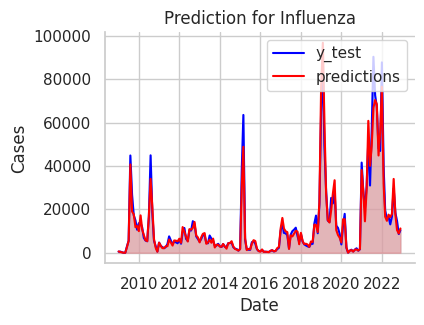

In [126]:
import matplotlib.pyplot as plt

# Customize Matplotlib settings
plt.figure(figsize=(4, 3))
plt.title('Prediction for Influenza')
plt.xlabel('Date')
plt.ylabel('Cases')

# Plot the data
plt.plot(test['Date'], y_test, label='y_test', color='blue')
plt.plot(test['Date'], predictions, label='predictions', color='red')
plt.fill_between(test['Date'], y_test, color='lightblue', alpha=0.5)
plt.fill_between(test['Date'], predictions, color='lightcoral', alpha=0.5)

# Add legend
plt.legend(loc='upper right')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1846.3988095238096
Mean Squared Error (MSE): 13367089.49404762
Root Mean Squared Error (RMSE): 3656.1030475148837
R-squared (R2): 0.9570092111331026
